In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
!pip install geopandas
import geopandas as gpd
# Please upload the files listings.csv and neigbourhoods.geojson

In [3]:
df = pd.read_csv('listings.csv')
df['tot_count']=1
new = df.groupby(['neighbourhood']).count().sort_values('tot_count',ascending=False)[['tot_count']]

In [4]:
new.reset_index(level=0, inplace=True)

In [5]:
new.head(4)

,neighbourhood,tot_count
0,78704,1822
1,78702,1263
2,78701,713
3,78741,622


In [6]:
df.groupby(['host_name']).count().sort_values('tot_count',ascending=False)[['tot_count']].head(10)

,tot_count
host_name,
Kia,398
WanderJaunt,131
TurnKey Vacation Rentals,124
Martin,101
Michael,98
David,76
Sarah,74
Ryan,67
James,62


# The above table is the answer of part c, i.e. top 10 hosts by no. of listings

In [7]:
x = gpd.read_file('neighbourhoods.geojson')

In [8]:
x['neighbourhood']=x['neighbourhood'].astype(int)
x = pd.merge(new,x,how="outer",left_on="neighbourhood",right_on="neighbourhood")

In [9]:
x = x.set_geometry('geometry')
x['centroid'] = x.centroid
x.head(2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  


,neighbourhood,tot_count,neighbourhood_group,geometry,centroid
0,78704,1822,None,"MULTIPOLYGON (((-97.75447 30.26507, -97.75410 ...",POINT (-97.76547 30.24373)
1,78702,1263,None,"MULTIPOLYGON (((-97.69186 30.24848, -97.69172 ...",POINT (-97.71454 30.26318)


Text(0.5, 1.0, 'Highest number of listings')

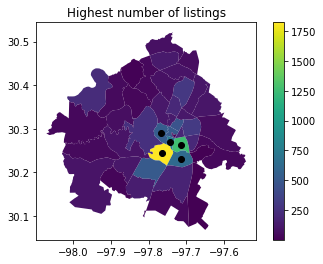

In [19]:
ax = x.plot('tot_count',legend=True)
x.iloc[0:5]['centroid'].plot(ax=ax,color = 'black')
plt.title('Highest number of listings')

# In the above graph Top 5 areas with the highest number of listings are marked. 

In [11]:
df = pd.read_csv('listings.csv')
df['priv_room_count']=1

In [12]:
AirBnb = df.loc[df['room_type']=='Private room'].groupby(['neighbourhood']).count().sort_values('priv_room_count',ascending=False)[['priv_room_count']]

In [13]:
AirBnb.reset_index(level=0, inplace=True)

In [14]:
AirBnb = pd.merge(AirBnb,x,how="outer",left_on="neighbourhood",right_on="neighbourhood")

In [15]:
AirBnb['entire_home'] = AirBnb['tot_count']-AirBnb['priv_room_count']

In [16]:
cols = list(AirBnb.columns)
AirBnb = AirBnb[cols[0:2]+[cols[-1]]+cols[2:6]]

In [22]:
AirBnb.head(5)

,neighbourhood,priv_room_count,entire_home,tot_count,neighbourhood_group,geometry,centroid
0,78704,223.0,1599.0,1822,None,"MULTIPOLYGON (((-97.75447 30.26507, -97.75410 ...",POINT (-97.76547 30.24373)
1,78702,195.0,1068.0,1263,None,"MULTIPOLYGON (((-97.69186 30.24848, -97.69172 ...",POINT (-97.71454 30.26318)
2,78741,194.0,428.0,622,None,"MULTIPOLYGON (((-97.70652 30.25024, -97.70628 ...",POINT (-97.71488 30.23040)
3,78705,142.0,363.0,505,None,"MULTIPOLYGON (((-97.72978 30.29871, -97.72893 ...",POINT (-97.73873 30.29255)
4,78745,140.0,373.0,513,None,"MULTIPOLYGON (((-97.79207 30.23183, -97.78922 ...",POINT (-97.79676 30.20702)


Text(0.5, 1.0, 'Private_rooms_thematic_map')

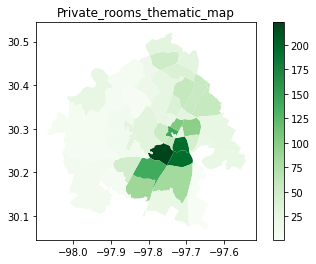

In [20]:
AirBnb = AirBnb.set_geometry('geometry')
AirBnb.plot('priv_room_count',cmap ='Greens' ,legend=True)
plt.title('Private_rooms_thematic_map')

Text(0.5, 1.0, 'Entire_home_thematic_map')

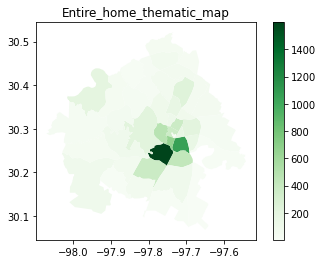

In [21]:
AirBnb.plot('entire_home',cmap='Greens',legend=True)
plt.title('Entire_home_thematic_map')

# In the above two graphs thematic maps with respect to private_rooms(i.e. single rooms) and entire_house are shown